In [1]:
# Import initial libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
# Removes the limit for the number of displayed columns

In [2]:
df = pd.read_excel('./PCA+India+Data_Census.xlsx', sheet_name='data')

In [3]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665,26044,2810,1728,439,343,1372,389,110,198,889,798,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603,18902,1829,1752,261,432,729,399,293,449,546,472,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771,6164,721,1689,316,1161,41,123,15,28,349,377,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,2244,1002,1118,491,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782,3088,317,463,74,158,50,126,6,33,187,146,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,16504,5717,7692,2523,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874,22289,2320,3497,862,1419,832,767,38,214,588,1097,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,30,0,0,6916,10184,1238,1597,3808,1328,3459,997,8,3,27,5,16,3,3408,986,349,331,1,6,3,5,2,2,343,318,4346,10453,317,284,1,6,3,5,2,2,311,271,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,4155,0,0,10292,14225,2054,7466,6458,5286,5619,4104,132,108,645,903,25,173,4817,2920,839,1182,26,30,272,515,11,87,530,550,5888,16405,684,845,23,16,234,385,7,64,420,380,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,0,1012,1750,1187,1602,362,1028,715,1031,325,534,8,8,1,1,16,38,300,487,390,497,19,9,11,14,78,165,282,309,834,1599,286,363,10,5,9,8,61,118,206,232,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,0,28,50,4206,5273,994,2739,2707,2174,2098,1666,553,225,63,28,8,7,1474,1406,609,508,108,163,69,55,4,8,428,282,2493,5838,473,336,84,119,58,34,3,4,328,179,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,0,161,264,10095,13362,1882,4687,6345,5278,5366,4514,255,246,88,67,37,39,4986,4162,979,764,69,71,62,45,13,21,835,627,5632,12771,806,642,63,69,45,28,11,17,687,528,173,122,6,2,17,17,2,4,148,99


In [5]:
df.sample(10)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
610,33,611,Tamil Nadu,The Nilgiris,41639,41562,80456,5145,5100,12791,24752,2027,3542,34533,50554,7029,29902,23412,37774,21126,33928,819,1198,4200,9318,153,422,15954,22990,2286,3846,60,109,463,1107,43,152,1720,2478,18150,42682,1974,3198,55,93,399,965,30,112,1490,2028,312,648,5,16,64,142,13,40,230,450
310,18,311,Assam,Sivasagar,34958,60396,87401,7645,7421,2486,3542,2029,2913,46996,55867,13400,31534,31805,30132,21713,18550,4476,2887,884,1056,368,406,15985,14201,10092,11582,3863,4329,1788,2518,336,811,4105,3924,28591,57269,8001,8334,2877,2666,1400,1835,259,565,3465,3268,2091,3248,986,1663,388,683,77,246,640,656
301,18,302,Assam,Goalpara,27462,46880,67426,7384,7220,2947,4172,14012,20064,30611,34895,16269,32531,24029,22689,18742,14125,6145,3413,2426,3638,443,811,9728,6263,5287,8564,744,1142,1912,3699,207,772,2424,2951,22851,44737,4512,7175,673,1005,1647,3209,163,622,2029,2339,775,1389,71,137,265,490,44,150,395,612
358,20,359,Jharkhand,Latehar,13057,22949,34664,4633,4908,4923,7305,11296,17443,14001,13390,8948,21274,8851,16100,3464,5036,1193,1697,953,1740,73,113,1245,1486,5387,11064,1421,2885,2877,6350,149,424,940,1405,14098,18564,4217,8412,1092,2193,2301,4950,107,281,717,988,1170,2652,329,692,576,1400,42,143,223,417
628,33,629,Tamil Nadu,Kanniyakumari,93269,106921,185603,14627,14095,4543,7876,596,899,88866,142015,18055,43588,57482,45623,47832,32282,713,546,4057,2676,732,3281,42330,25779,9650,13341,189,234,1756,1630,457,2875,7248,8602,49439,139980,7892,10205,174,192,1440,1188,333,2011,5945,6814,1758,3136,15,42,316,442,124,864,1303,1788
502,27,503,Maharashtra,Amravati,75190,94800,158917,11099,10968,18962,32952,10709,17644,78797,111639,16003,47278,48678,65792,42315,54147,4299,5367,18919,34420,721,1026,18376,13334,6363,11645,391,877,3539,8187,115,368,2318,2213,46122,93125,5420,9681,345,709,3075,6940,90,252,1910,1780,943,1964,46,168,464,1247,25,116,408,433
405,22,406,Chhattisgarh,Bilaspur,79023,89658,159147,13742,13653,17512,31270,17111,33948,66439,71212,23219,87935,39890,71291,29730,43143,4335,8218,8224,19115,535,687,16636,15123,10160,28148,1411,3492,6374,21017,192,475,2183,3164,49768,87856,7994,21516,1068,2540,5091,16362,132,343,1703,2271,2166,6632,343,952,1283,4655,60,132,480,893
521,27,522,Maharashtra,Ahmadnagar,106714,130793,236112,20261,20144,22735,39143,11062,19586,99344,138868,31449,97244,58687,115772,53595,104150,14797,32325,13971,42822,1297,3518,23530,25485,5092,11622,743,1945,1538,5262,215,867,2596,3548,72106,120340,4329,9786,578,1574,1343,4599,168,609,2240,3004,763,1836,165,371,195,663,47,258,356,544
111,8,112,Rajasthan,Nagaur,54004,101008,144562,19308,18425,21219,30248,357,473,68633,58520,32375,86042,40461,50905,31752,27405,9524,15557,3868,4691,844,474,17516,6683,8709,23500,3034,11734,2968,7901,145,426,2562,3439,60547,93657,7326,19104,2520,9752,2508,6429,127,290,2171,2633,1383,4396,514,1982,460,1472,18,136,391,806
195,9,196,Uttar Pradesh,Chandauli,32744,89177,110803,16533,15750,18204,22819,1802,2395,62654,54040,26523,56763,35380,27901,20135,12692,4693,3053,3966,2955,1848,1609,9628,5075,15245,15209,1522,1924,7052,7836,1163,1743,5508,3706,53797,82902,12250,11163,1203,1330,5749,5798,896,1226,4402,2809,2995,4046,319,594,1303,2038,267,517,1106,897


In [6]:
df.shape

(640, 61)

There are <b>640</b> records and <b>61</b> columns.

In [7]:
df.dtypes

State Code         int64
Dist.Code          int64
State             object
Area Name         object
No_HH              int64
TOT_M              int64
TOT_F              int64
M_06               int64
F_06               int64
M_SC               int64
F_SC               int64
M_ST               int64
F_ST               int64
M_LIT              int64
F_LIT              int64
M_ILL              int64
F_ILL              int64
TOT_WORK_M         int64
TOT_WORK_F         int64
MAINWORK_M         int64
MAINWORK_F         int64
MAIN_CL_M          int64
MAIN_CL_F          int64
MAIN_AL_M          int64
MAIN_AL_F          int64
MAIN_HH_M          int64
MAIN_HH_F          int64
MAIN_OT_M          int64
MAIN_OT_F          int64
MARGWORK_M         int64
MARGWORK_F         int64
MARG_CL_M          int64
MARG_CL_F          int64
MARG_AL_M          int64
MARG_AL_F          int64
MARG_HH_M          int64
MARG_HH_F          int64
MARG_OT_M          int64
MARG_OT_F          int64
MARGWORK_3_6_M     int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

### Null and Duplicate Values Treatment

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


There are no null values and no duplicate records in the dataset.

### Univariate and Bivariate Analysis

Let's analyse some features of the dataset.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [12]:
# 5 Higest Male Population States
df.groupby('State')['TOT_M'].sum().sort_values(ascending=False).head(5)

State
Uttar Pradesh    9043969
Maharashtra      4196130
Bihar            4025198
West Bengal      3912553
Karnataka        3409482
Name: TOT_M, dtype: int64

In [13]:
# 5 Lowest Male Population States
df.groupby('State')['TOT_M'].sum().sort_values(ascending=True).head(5)

State
Dadara & Nagar Havelli       6982
Lakshadweep                 12823
Daman & Diu                 13153
Andaman & Nicobar Island    18726
Sikkim                      26664
Name: TOT_M, dtype: int64

In [14]:
# 5 Highest Male Population States
df.groupby('State')['TOT_F'].sum().sort_values(ascending=False).head(5)

State
Uttar Pradesh     12023885
Maharashtra        7138557
Andhra Pradesh     6097235
West Bengal        6016118
Tamil Nadu         5610310
Name: TOT_F, dtype: int64

In [15]:
# 5 Lowest Female Population States
df.groupby('State')['TOT_F'].sum().sort_values(ascending=True).head(5)

State
Dadara & Nagar Havelli      10831
Lakshadweep                 14772
Daman & Diu                 18706
Andaman & Nicobar Island    28691
Sikkim                      41518
Name: TOT_F, dtype: int64

In [16]:
state_gender_df = df.groupby('State')[['TOT_M','TOT_F']].sum()

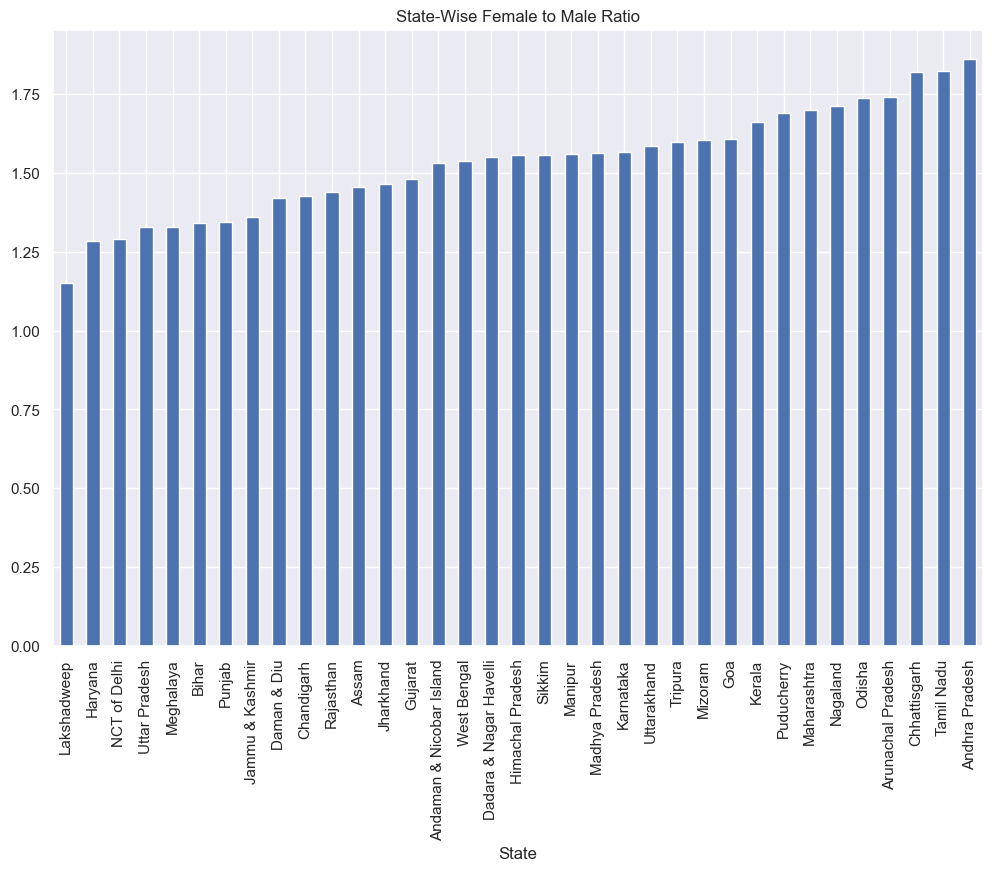

In [17]:
plt.figure(figsize=(12,8))
(state_gender_df.TOT_F/state_gender_df.TOT_M).sort_values(ascending=True).plot(kind='bar')
plt.title('State-Wise Female to Male Ratio');

In [18]:
df['TOT_WORK'] = df.TOT_WORK_M + df.TOT_WORK_F

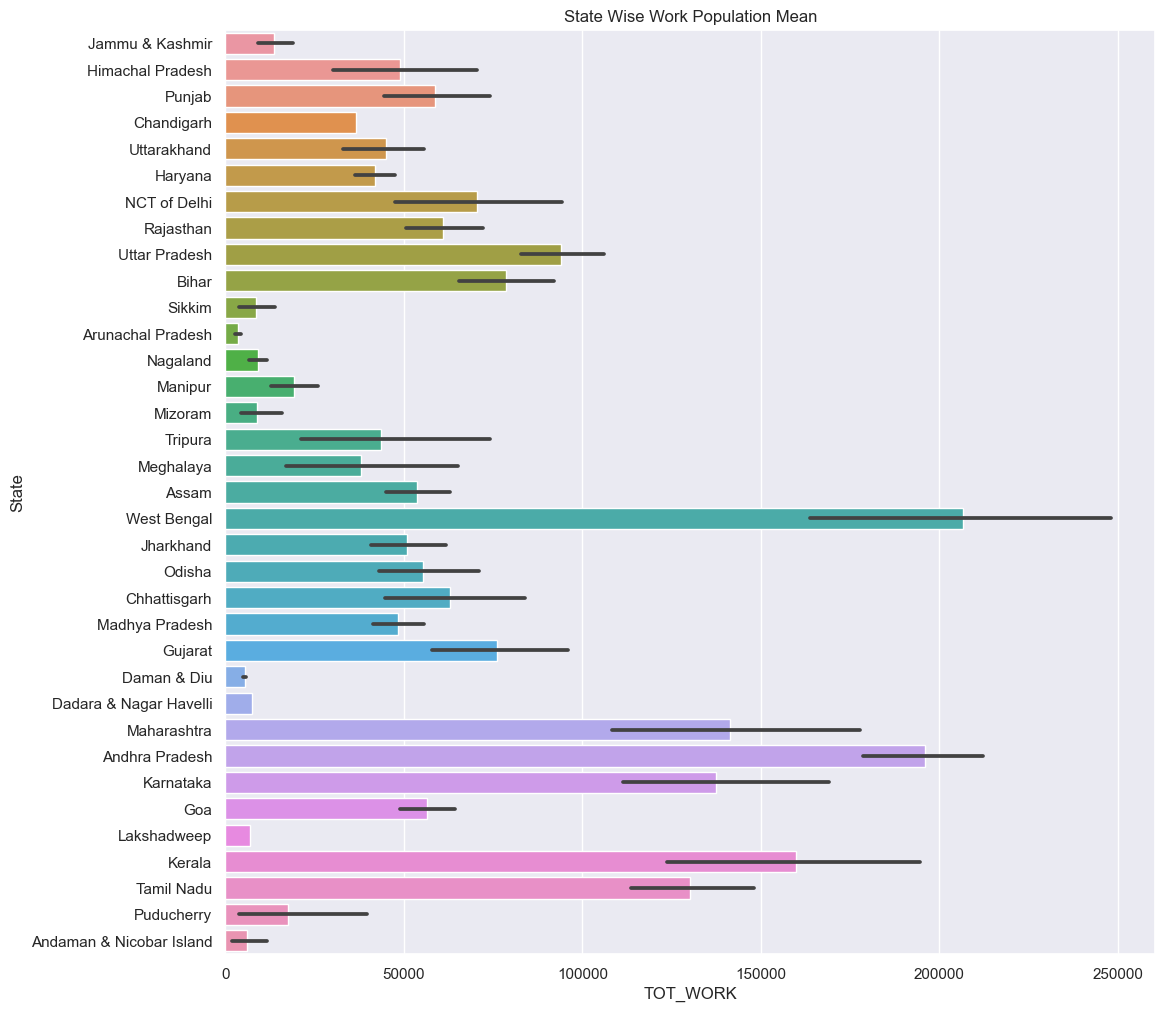

In [19]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='TOT_WORK', y='State')
plt.title('State Wise Work Population Mean');

West Bengal has the highest workers population on average, whereas Arunachal Pradesh has the lowest workers population on average.

In [20]:
# drop TOT_WORK column used in the above graph
df.drop('TOT_WORK', axis=1, inplace=True)

In [21]:
main_pop_cat = ['MAIN_CL_M','MAIN_CL_F','MAIN_AL_M','MAIN_AL_F','MAIN_HH_M','MAIN_HH_F','MAIN_OT_M','MAIN_OT_F']

/Users/appurohi/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


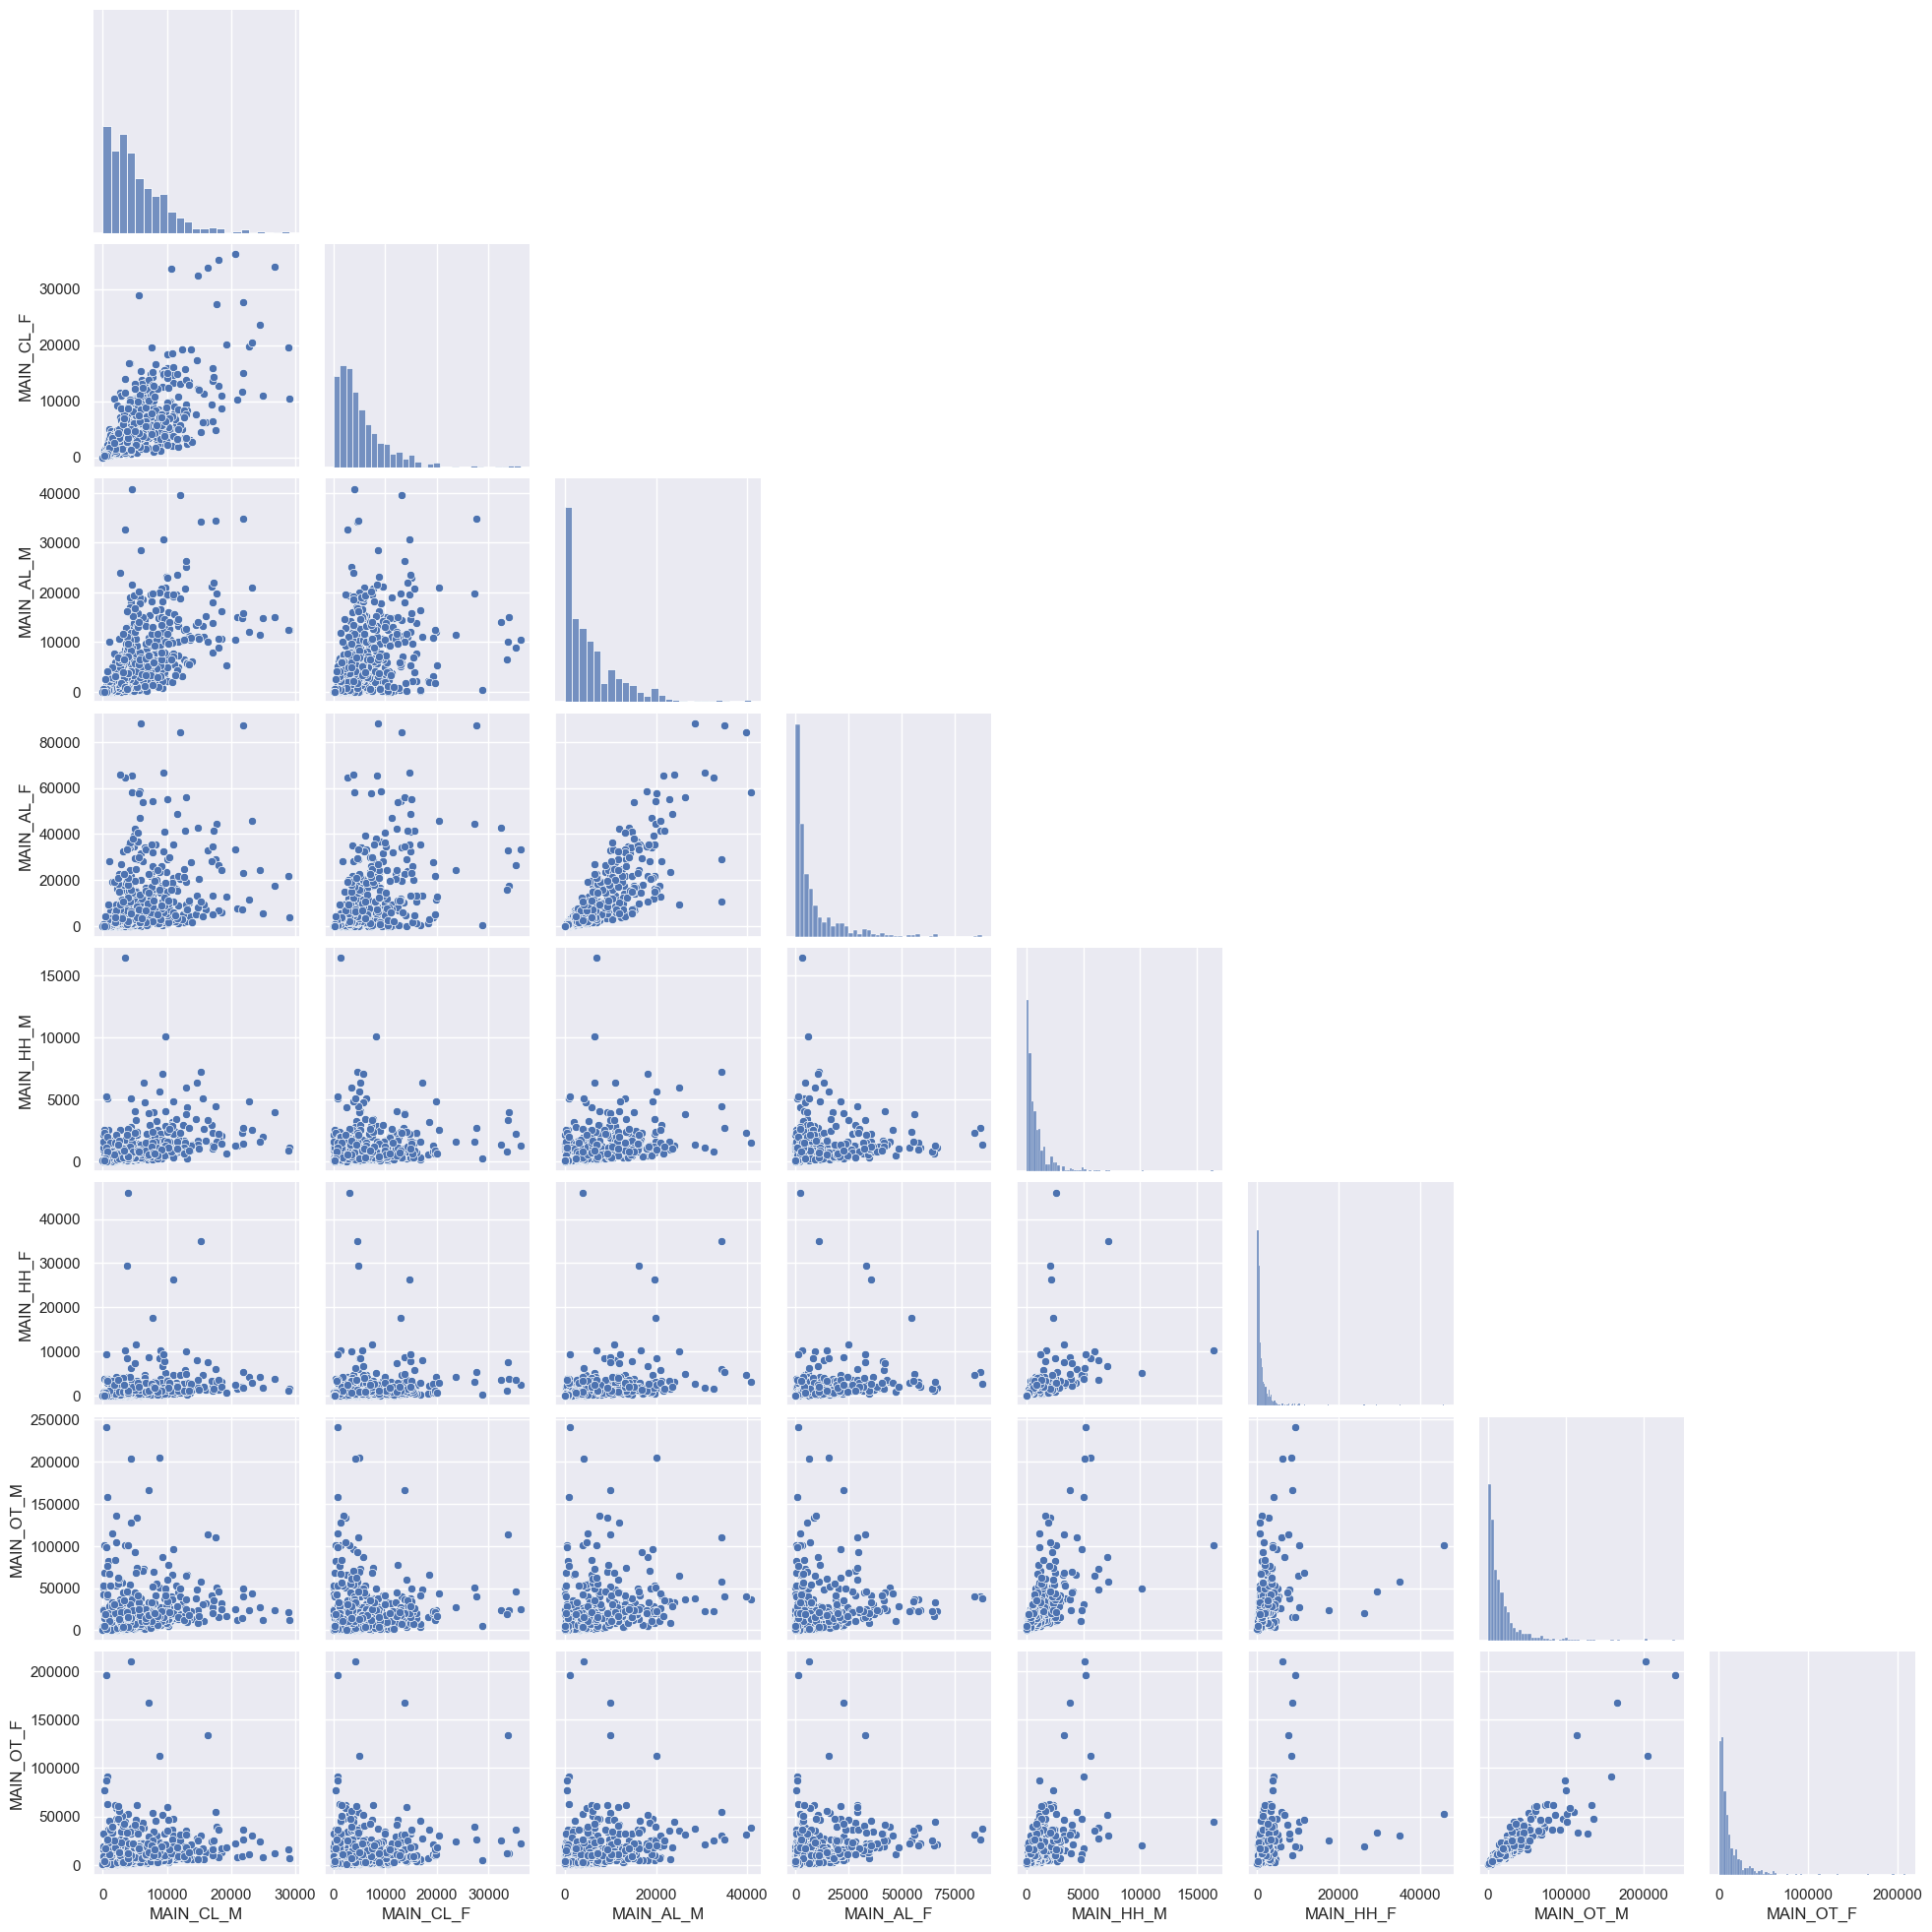

In [ ]:
sns.pairplot(df[main_pop_cat], corner=True);

- All the data in these features is right skewed with some outliers.
- every M and F population have some correlation.
- like, Agricultural Labourers population M and F seem highly correlated.

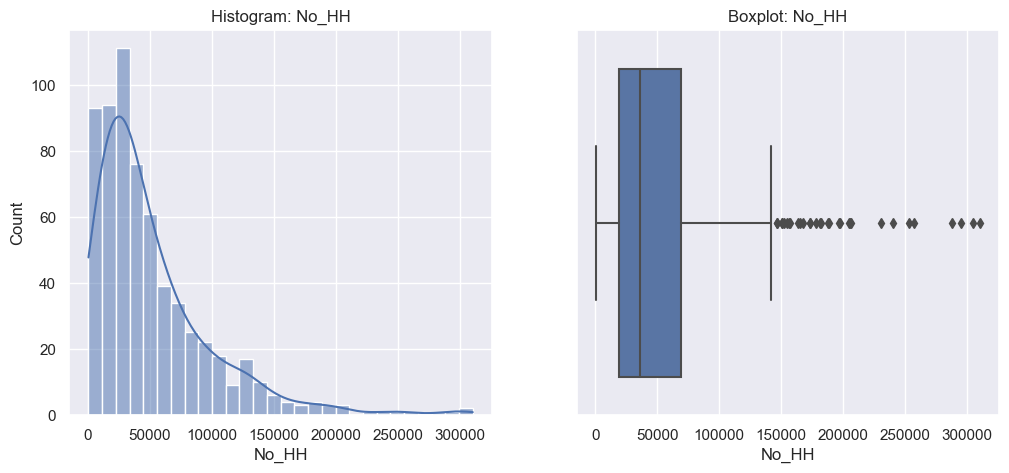

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='No_HH', kde=True)
plt.title('Histogram: No_HH')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='No_HH')
plt.title('Boxplot: No_HH');

In [24]:
num_cols = list(df.select_dtypes(['int','float']).columns)
num_cols

['State Code',
 'Dist.Code',
 'No_HH',
 'TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_M',
 'MARG_CL_0_3_F',
 'MARG_AL_0_3_M',
 'MARG_AL_0_3_F',
 'MARG_HH_0_3_M',
 'MARG_HH_0_3_F',
 'MARG_OT_0_3_M',
 'MARG_OT_0_3_F',
 'NON_WORK_M',
 'NON_WORK_F']

State Code and Dist. Code are actually categorical as they indicate the numerical code of the state and distrit name. So, we can remove them from our calculation.

In [25]:
num_cols.remove('State Code')
num_cols.remove('Dist.Code')
num_cols

['No_HH',
 'TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_M',
 'MARG_CL_0_3_F',
 'MARG_AL_0_3_M',
 'MARG_AL_0_3_F',
 'MARG_HH_0_3_M',
 'MARG_HH_0_3_F',
 'MARG_OT_0_3_M',
 'MARG_OT_0_3_F',
 'NON_WORK_M',
 'NON_WORK_F']

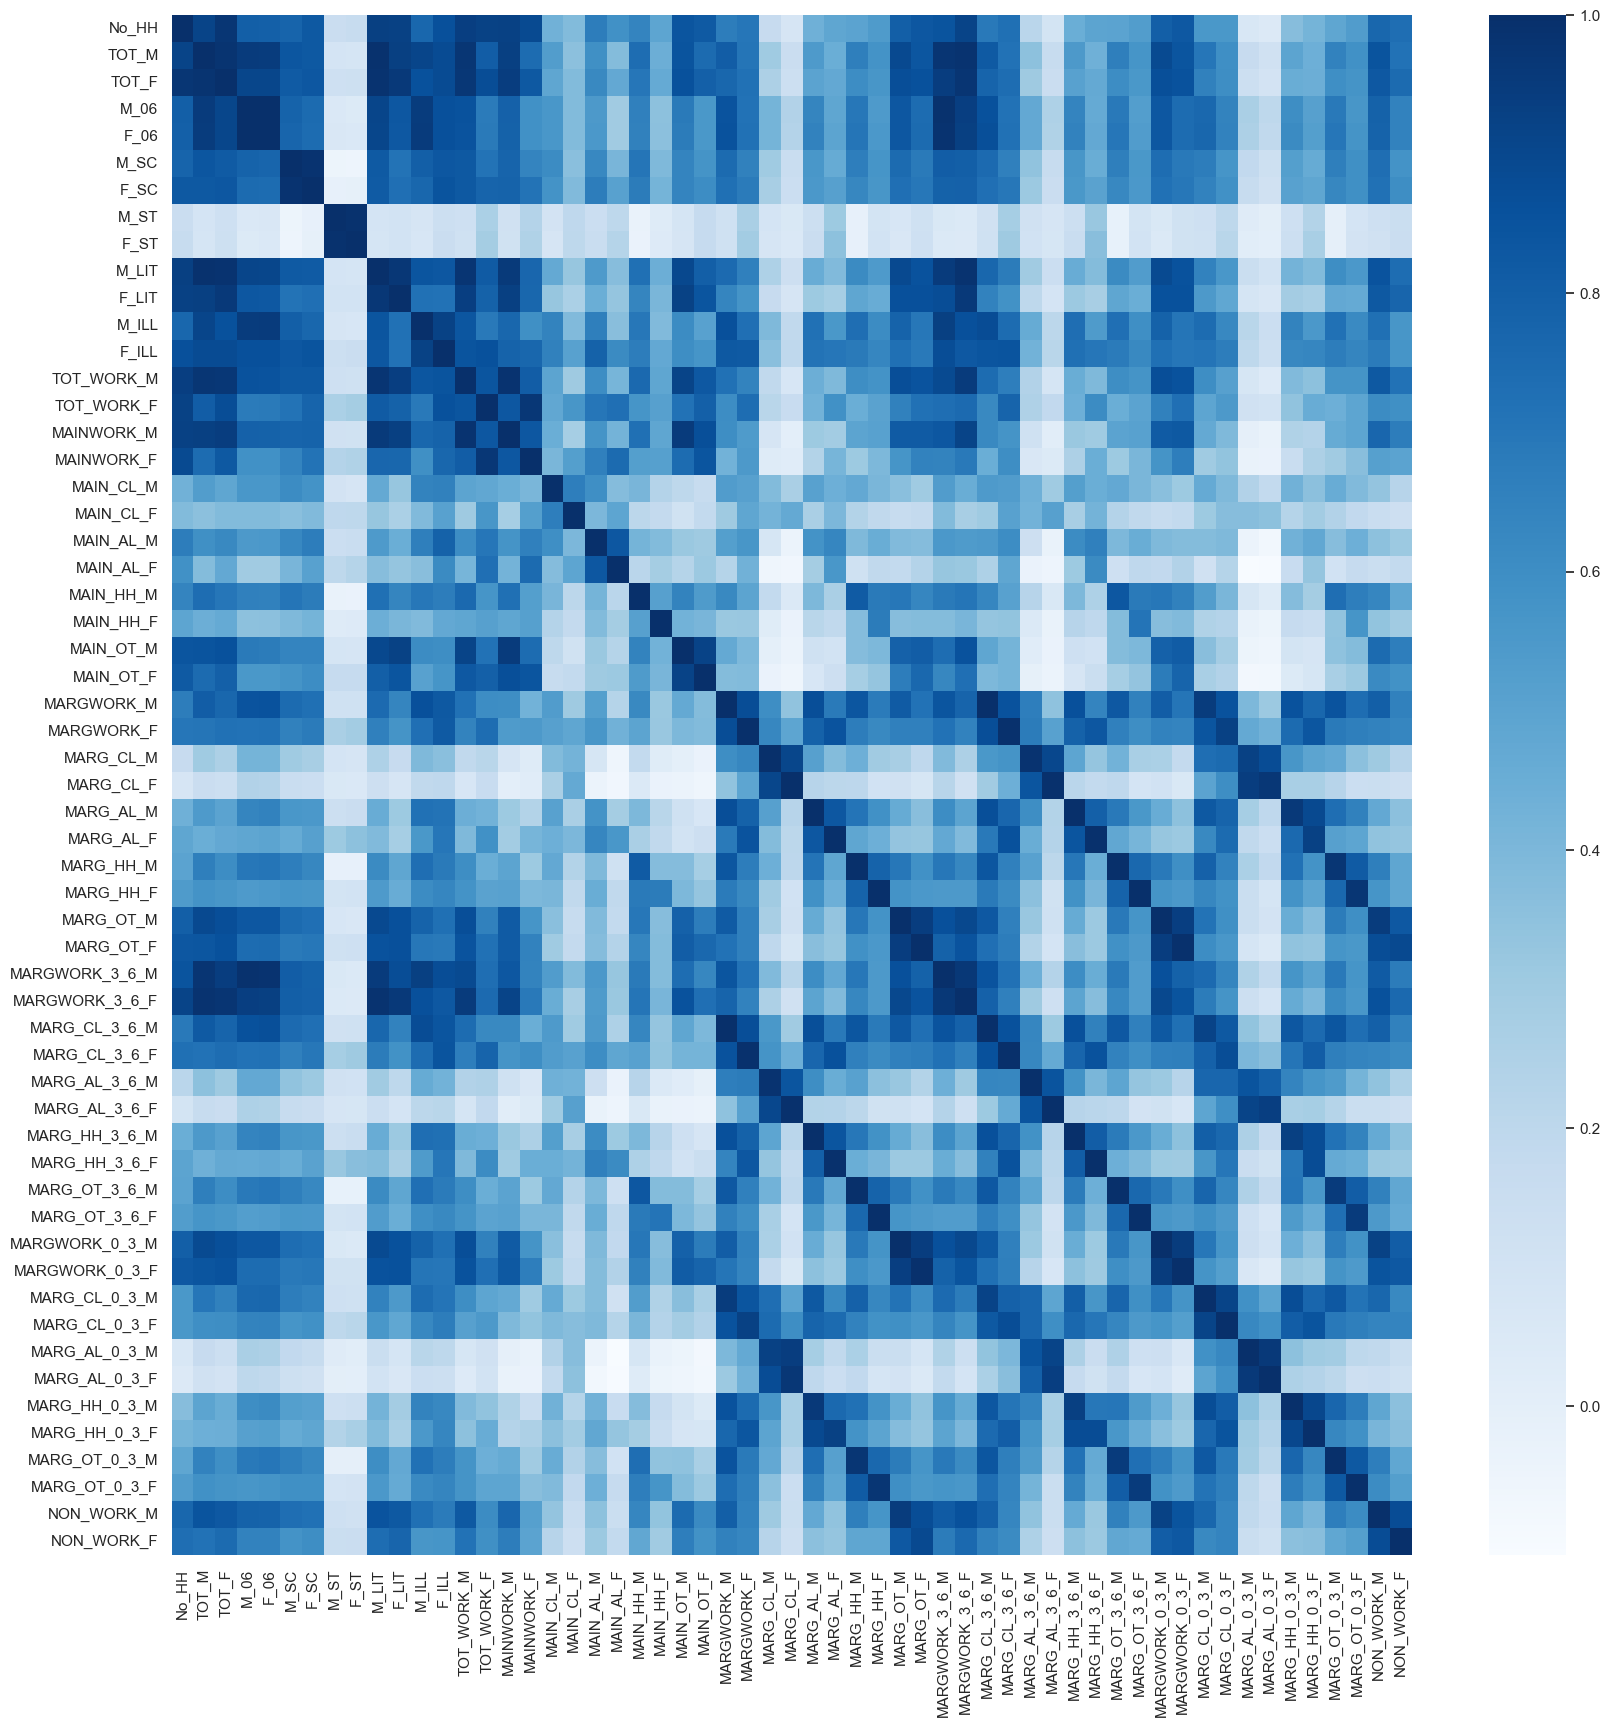

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(), cmap='Blues');

### Outliers
There are outliers in the dataset. PCA is sensitive to outliers, as the calculations involve squarring of the values and outliers can dominate in that case. We are chosing not to treat outliers in this problem.

### Scaling

In [27]:
import scipy.stats as stats

In [28]:
df_num_scaled = df[num_cols].apply(stats.zscore)

#### Before Scaling

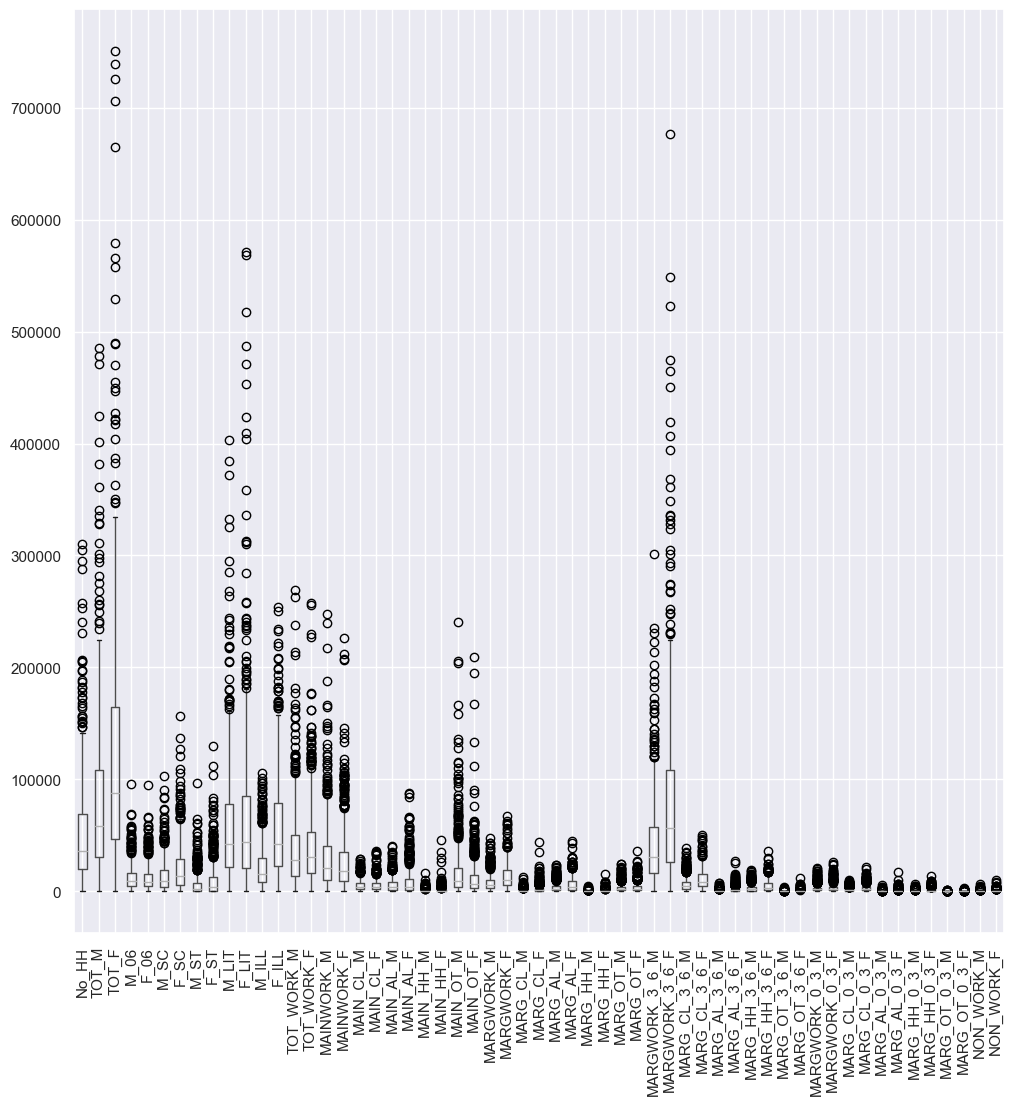

In [29]:
plt.figure(figsize=(12,12))
df[num_cols].boxplot()
plt.xticks(rotation=90);

#### After Scaling

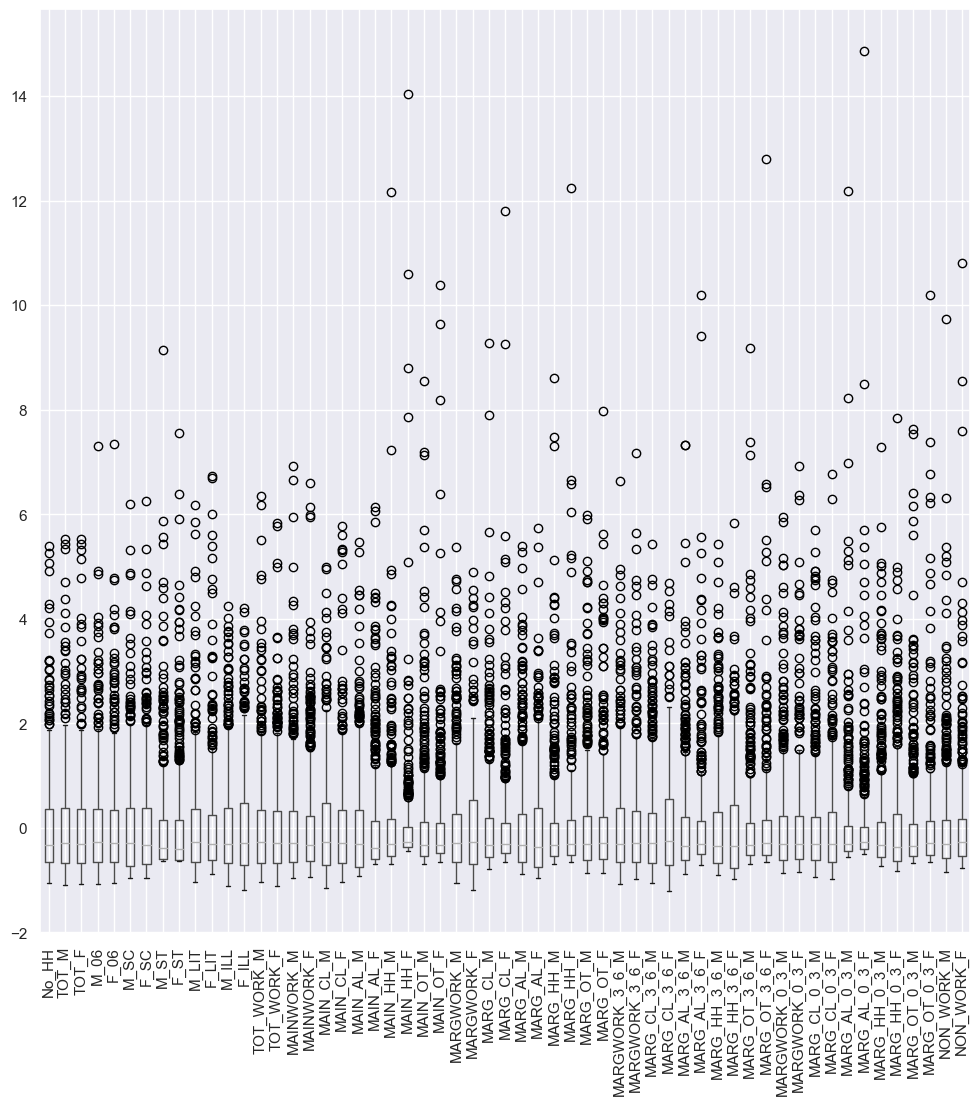

In [30]:
plt.figure(figsize=(12,12))
df_num_scaled.boxplot()
plt.xticks(rotation=90);

As scaling transforms the data to fit into a specific range or distribution, having outliers in the dataset impacts scaling. Since z-score scaling uses mean and standard deviation, and outliers affect mean the most by pulling the mean towards them, z-score scaling is also affected by extreme outliers. It is still a better technique to use than min-max scaling which is affected by outliers heavily.</br>
As shown in the before and after comparison as well, the outliers are not eliminated by scaling but the data is fit for further computation now as every point is on the same scale, even the outliers.

### PCA

In [31]:
from sklearn.decomposition import PCA

Let us go with components=number of all eligible columns in the dataset (num_cols)

In [32]:
len(num_cols)

57

#### Covariance Matrix of Scaled Data

In [33]:
np.cov(df_num_scaled)

array([[0.06173772, 0.05024455, 0.03317398, ..., 0.03498547, 0.03025035,
        0.02714776],
       [0.05024455, 0.07966605, 0.03858426, ..., 0.0504162 , 0.03813376,
        0.03399651],
       [0.03317398, 0.03858426, 0.05855969, ..., 0.04253603, 0.03684299,
        0.03313212],
       ...,
       [0.03498547, 0.0504162 , 0.04253603, ..., 0.04525044, 0.03695346,
        0.03424301],
       [0.03025035, 0.03813376, 0.03684299, ..., 0.03695346, 0.03262291,
        0.03059199],
       [0.02714776, 0.03399651, 0.03313212, ..., 0.03424301, 0.03059199,
        0.03110606]])

In [34]:
pca = PCA(n_components=57, random_state=42)
pca_transformed = pca.fit_transform(df_num_scaled)

#### Eigen Vectors for all 57

In [35]:
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.0704523 , -0.05264272, ..., -0.02231877,
         0.11946354, -0.04845696],
       [ 0.        , -0.24636519,  0.01774458, ...,  0.02025526,
        -0.0668827 ,  0.01957272],
       [-0.        ,  0.01550741,  0.49527159, ..., -0.02394017,
         0.0773159 , -0.02955554]])

#### Eigen Values for all 57

In [36]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 6.93346479e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

#### Chosing the correct number of components

In [37]:
# DataFrame with columns and their coefficients for each PC
df_pca = pd.DataFrame(
    pca.components_.T,
    columns=['PC'+str(x) for x in range(1,58)],
    index=df_num_scaled.columns
)

In [38]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,0.010592,0.086193,-0.104175,-0.028892,0.057320,0.022263,-0.079278,-0.132798,-0.099506,0.061533,-0.091411,-0.391264,0.320335,-0.002012,0.096656,0.135743,0.206451,0.038778,0.114602,0.160491,0.000371,-0.083465,0.641877,-0.212698,0.163095,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,0.011145,0.018850,-0.035665,0.052947,-0.020008,-0.039004,0.002663,0.027645,0.016544,-0.019839,0.029228,0.062001,-0.009203,-0.033432,-0.022089,-0.018103,-0.145283,0.011880,-0.083065,-0.013389,-0.210063,0.083960,0.025511,-0.142698,0.035107,7.172363e-01,-3.126623e-01,-3.359762e-03,-3.701704e-02,-8.255419e-02,2.724156e-03,-2.262036e-01,-7.262643e-02,-1.161195e-01,4.743630e-02,-1.461413e-01,8.061488e-02,-1.919829e-02,-6.282605e-02,8.746270e-02,-1.018758e-01,5.069979e-02,-7.011437e-02,3.785019e-03,7.045230e-02,-2.463652e-01,1.550741e-02
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,0.007734,0.093551,-0.056325,0.011802,-0.009791,-0.023951,-0.092152,-0.036567,-0.036819,0.036395,-0.041627,-0.150365,0.125400,-0.010409,0.030536,0.026087,-0.005179,-0.016509,0.059815,-0.013962,0.040267,0.048698,-0.217191,0.210813,-0.042635,-3.186692e-02,-1.106595e-01,-2.076320e-01,1.997885e-01,-3.246717e-02,1.056939e-01,-8.468020e-02,6.966542e-02,-1.094083e-01,-1.017084e-02,6.610271e-02,1.381512e-01,-2.869994e-01,3.829100e-01,-3.195628e-01,-1.280595e-01,8.398273e-02,8.353208e-02,-9.453962e-02,-5.264272e-02,1.774458e-02,4.952716e-01
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,0.081252,0.104353,0.018338,0.081818,-0.221402,0.060763,-0.087626,0.050438,0.061714,0.016907,-0.047919,0.122702,-0.192471,-0.017838,-0.048691,-0.101451,0.135186,-0.066563,-0.156359,0.033903,0.203545,-0.207898,0.356893,0.154429,-0.645233,3.469447e-16,1.949829e-15,9.766493e-16,6.574602e-16,-1.635844e-15,1.700029e-16,7.112366e-16,3.868433e-16,2.055647e-15,1.777224e-15,-1.627171e-15,3.044440e-16,7.650131e-16,4.510281e-16,1.734723e-15,2.411266e-16,2.571728e-16,2.048708e-15,-3.165870e-16,7.528700e-16,-9.714451e-17,2.352285e-15
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,0.081964,0.105280,0.014711,0.048778,-0.206328,0.077683,-0.085937,0.032421,0.079583,0.040249,-0.043424,0.105216,-0.201443,0.041017,-0.033593,-0.079513,0.209663,-0.046129,-0.017098,-0.010688,0.402990,-0.283681,-0.133796,-0.163689,0.610698,1.804112e-16,-1.228184e-15,-1.169204e-15,-1.028691e-15,1.634110e-15,-2.081668e-17,-2.324529e-16,3.295975e-17,-1.524822e-15,-1.478852e-15,8.673617e-16,-1.630640e-16,-7.355228e-16,-3.053113e-16,-1.030426e-15,-6.574602e-16,-1.812786e-16,-1.571659e-15,3.616898e-16,-3.053113e-16,7.632783e-17,-1.408595e-15
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,-0.228821,-0.076365,0.179625,0.106286,-0.338113,0.031750,0.013473,-0.083043,0.010140,0.052948,-0.000769,0.131316,-0.090675,-0.007624,0.017202,-0.001234,-0.093192,0.080872,0.002211,-0.082203,-0.076630,0.060610,0.290331,0.525729,0.276464,1.693090e-15,8.326673e-17,7.528700e-16,-6.123574e-16,6.973588e-16,-3.782781e-16,-8.534840e-16,1.058181e-16,-2.168404e-16,-5.368969e-16,1.176143e-15,-5.932754e-16,-4.209957e-16,-1.528291e-15,3.295975e-16,1.020017e-

In [39]:
# cummulative variance ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

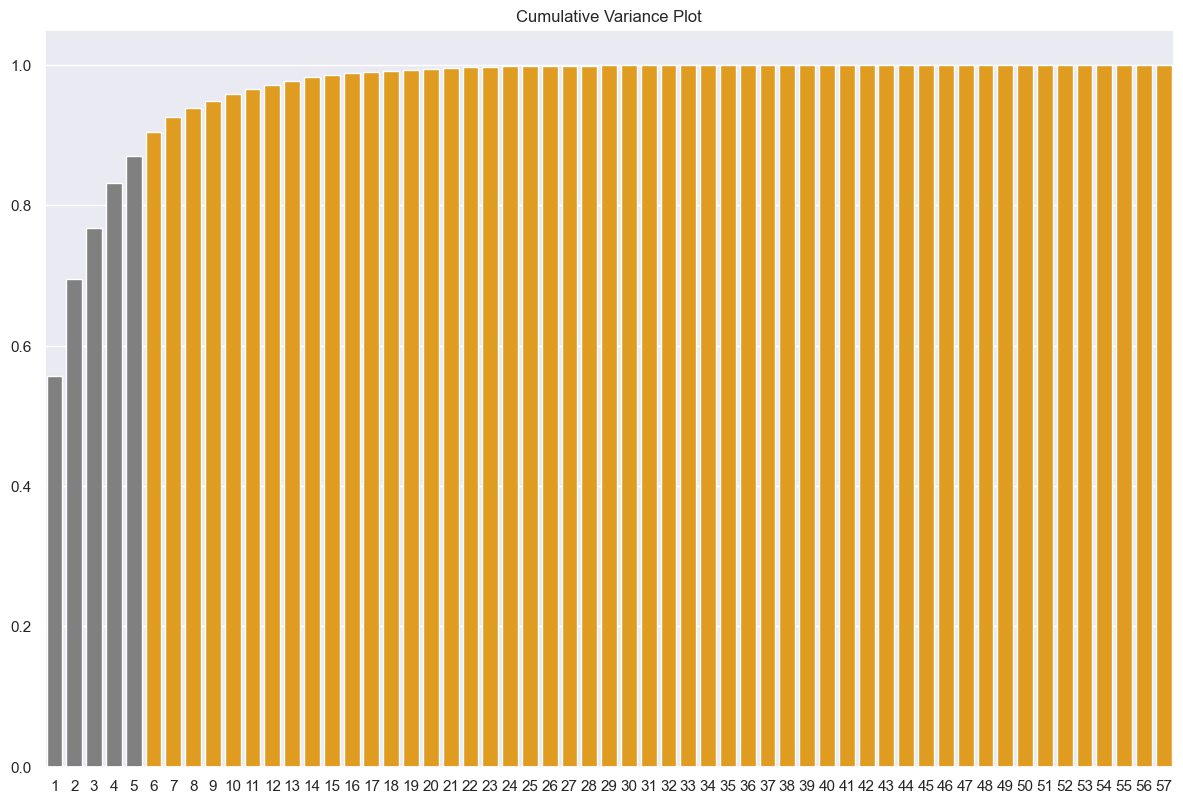

In [40]:
col_pal = ['orange' if x>0.90 else 'grey' for x in np.cumsum(pca.explained_variance_ratio_)]
plt.figure(figsize=(12,8))
sns.barplot(
    x = np.arange(1,58,1),
    y = np.cumsum(pca.explained_variance_ratio_),
    palette=col_pal,
)
plt.tight_layout()
plt.title('Cumulative Variance Plot');

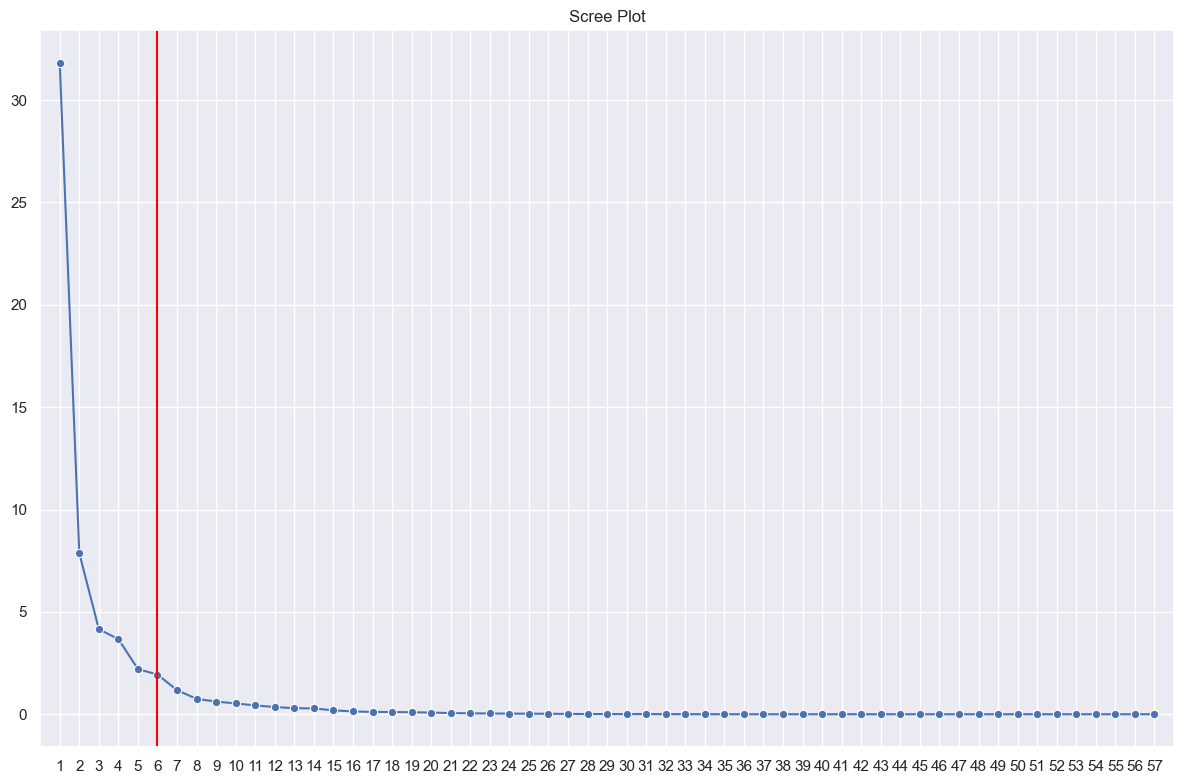

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(
    x = np.arange(1,58,1),
    y = pca.explained_variance_,
    marker='o'
)
plt.axvline(6, c='red')
plt.title('Scree Plot')
plt.xlim(0,58)
plt.xticks(np.arange(1,58,1))
plt.tight_layout();

The ideal number of Principal Components is coming out to be 6 which is covering at least 90% of the variance.

In [42]:
df_pca = df_pca.iloc[:, :6]

In [43]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


In [44]:
pca.explained_variance_[:6]

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

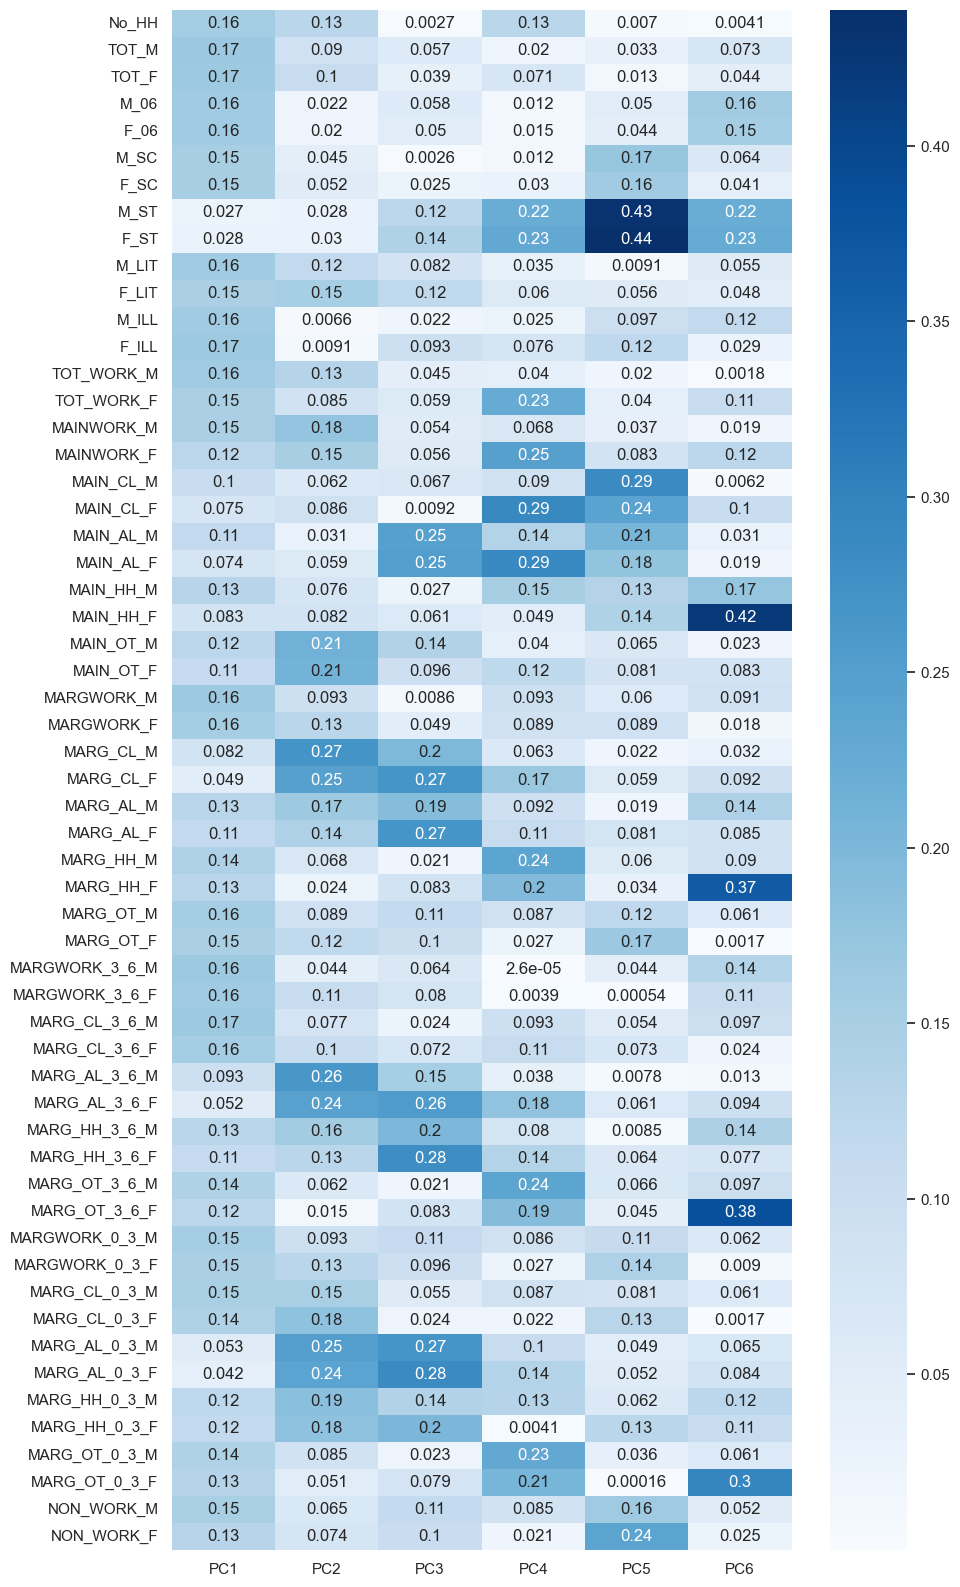

In [45]:
plt.figure(figsize=(10,20))
sns.heatmap(abs(df_pca), cmap='Blues', annot=True);

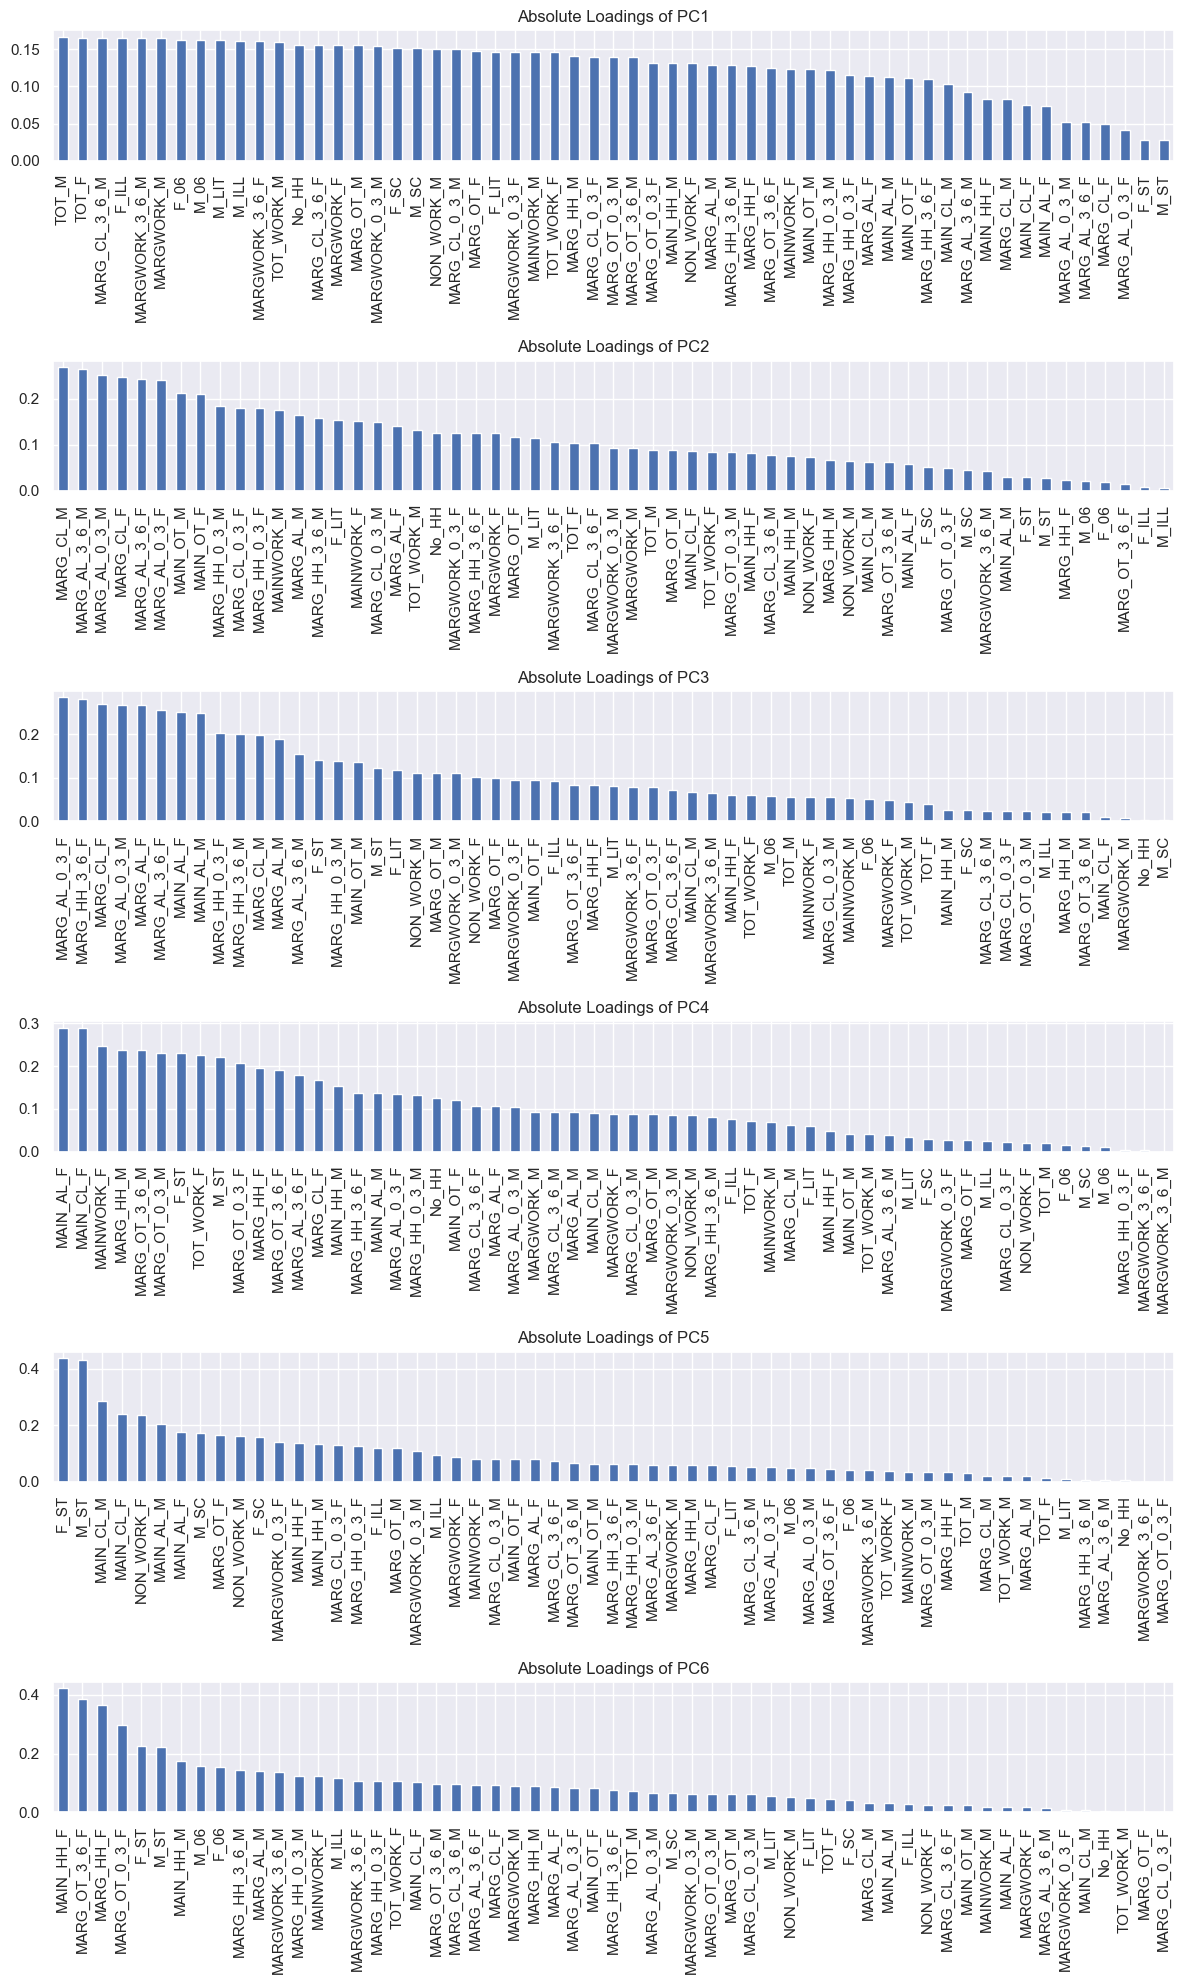

In [46]:
plt.figure(figsize=(12,20))
c = 1
for i in df_pca.columns:
    plt.subplot(6,1,c)
    abs(df_pca[i]).T.sort_values(ascending = False).plot.bar()
    plt.title(f'Absolute Loadings of {i}')
    c += 1

plt.tight_layout();

#### Principal Components
- PC1 - explains the most variance in the data 31.81. All the columns are contributing some amount to this principal component.
- PC2 - variance is 7.86. MARG_CL_M is contributing the most to this with some other MARG_% features not far behind.
- PC3 - variance is 4.15. Some other MARG_% columns are major contributers to the variance of this component like, MARG_AL_0_3_F, MARG_HH_3_6_F, etc.
- PC4 - variance is 3.66. As we are moving towards more components, the number of contributers to the variance is less and are dominated by 1 or 2 features. Like, this one is dominated by MAIN_AL_F and MAIN_CL_F mostly.
- PC5 - variance is 2.20. F_ST and M_ST are major contributers to this component.
- PC6 - variance is 1.93. MAIN_HH_F is the majr contributor to this component.

#### Equation of PC1

In [47]:
df_pca.iloc[:, 0]

No_HH             0.156021
TOT_M             0.167118
TOT_F             0.165553
M_06              0.162193
F_06              0.162566
M_SC              0.151358
F_SC              0.151567
M_ST              0.027234
F_ST              0.028183
M_LIT             0.161993
F_LIT             0.146873
M_ILL             0.161749
F_ILL             0.165248
TOT_WORK_M        0.159872
TOT_WORK_F        0.145936
MAINWORK_M        0.146201
MAINWORK_F        0.123970
MAIN_CL_M         0.103127
MAIN_CL_F         0.074540
MAIN_AL_M         0.113356
MAIN_AL_F         0.073882
MAIN_HH_M         0.131573
MAIN_HH_F         0.083383
MAIN_OT_M         0.123526
MAIN_OT_F         0.111021
MARGWORK_M        0.164615
MARGWORK_F        0.155396
MARG_CL_M         0.082389
MARG_CL_F         0.049195
MARG_AL_M         0.128599
MARG_AL_F         0.114305
MARG_HH_M         0.140853
MARG_HH_F         0.127670
MARG_OT_M         0.155263
MARG_OT_F         0.147287
MARGWORK_3_6_M    0.164972
MARGWORK_3_6_F    0.161253
M

In [48]:
for i in range(0, len(df_pca['PC1'])):
    print(
        f"{df_pca['PC1'][i]} x {df_pca['PC1'].index[i]}",
        end=' + '
    )

0.15602057858567925 x No_HH + 0.16711763488533515 x TOT_M + 0.16555317909064896 x TOT_F + 0.16219294820465543 x M_06 + 0.1625663956573483 x F_06 + 0.15135784909060582 x M_SC + 0.1515665001920887 x F_SC + 0.027234194571004233 x M_ST + 0.028183315015872696 x F_ST + 0.1619928373362916 x M_LIT + 0.14687268030140294 x F_LIT + 0.1617494446347163 x M_ILL + 0.1652481873683337 x F_ILL + 0.15987198816201292 x TOT_WORK_M + 0.14593580377247625 x TOT_WORK_F + 0.14620072976305987 x MAINWORK_M + 0.12397028357273655 x MAINWORK_F + 0.10312715883019864 x MAIN_CL_M + 0.0745397855548368 x MAIN_CL_F + 0.11335571218156727 x MAIN_AL_M + 0.07388215903155891 x MAIN_AL_F + 0.13157258402275596 x MAIN_HH_M + 0.08338263967435766 x MAIN_HH_F + 0.12352624192253081 x MAIN_OT_M + 0.11102126391320132 x MAIN_OT_F + 0.1646154785601101 x MARGWORK_M + 0.15539561810834127 x MARGWORK_F + 0.08238854140704541 x MARG_CL_M + 0.04919539567873822 x MARG_CL_F + 0.12859856294668556 x MARG_AL_M + 0.11430507278919892 x MARG_AL_F + 0.1

$$
0.15602057858567925 x No_HH + 0.16711763488533515 x TOT_M + 0.16555317909064896 x TOT_F + 0.16219294820465543 x M_06 + 0.1625663956573483 x F_06 + 0.15135784909060582 x M_SC + 0.1515665001920887 x F_SC + 0.027234194571004233 x M_ST + 0.028183315015872696 x F_ST + 0.1619928373362916 x M_LIT + 0.14687268030140294 x F_LIT + 0.1617494446347163 x M_ILL + 0.1652481873683337 x F_ILL + 0.15987198816201292 x TOT_WORK_M + 0.14593580377247625 x TOT_WORK_F + 0.14620072976305987 x MAINWORK_M + 0.12397028357273655 x MAINWORK_F + 0.10312715883019864 x MAIN_CL_M + 0.0745397855548368 x MAIN_CL_F + 0.11335571218156727 x MAIN_AL_M + 0.07388215903155891 x MAIN_AL_F + 0.13157258402275596 x MAIN_HH_M + 0.08338263967435766 x MAIN_HH_F + 0.12352624192253081 x MAIN_OT_M + 0.11102126391320132 x MAIN_OT_F + 0.1646154785601101 x MARGWORK_M + 0.15539561810834127 x MARGWORK_F + 0.08238854140704541 x MARG_CL_M + 0.04919539567873822 x MARG_CL_F + 0.12859856294668556 x MARG_AL_M + 0.11430507278919892 x MARG_AL_F + 0.14085322696185132 x MARG_HH_M + 0.1276695980147536 x MARG_HH_F + 0.155262871623116 x MARG_OT_M + 0.14728658356523394 x MARG_OT_F + 0.16497194993714456 x MARGWORK_3_6_M + 0.16125343257531358 x MARGWORK_3_6_F + 0.1655016110258062 x MARG_CL_3_6_M + 0.1556470491448339 x MARG_CL_3_6_F + 0.09301420640192848 x MARG_AL_3_6_M + 0.0515358639701522 x MARG_AL_3_6_F + 0.12857611642867817 x MARG_HH_3_6_M + 0.11064584323696926 x MARG_HH_3_6_F + 0.13959276252158825 x MARG_OT_3_6_M + 0.12454590917258752 x MARG_OT_3_6_F + 0.15429378578916028 x MARGWORK_0_3_M + 0.14628565406214417 x MARGWORK_0_3_F + 0.15012570610262055 x MARG_CL_0_3_M + 0.1401570468901039 x MARG_CL_0_3_F + 0.05254178285396341 x MARG_AL_0_3_M + 0.04178595301201031 x MARG_AL_0_3_F + 0.12184035387925014 x MARG_HH_0_3_M + 0.11601141016824106 x MARG_HH_0_3_F + 0.13986877411042797 x MARG_OT_0_3_M + 0.1321922445819653 x MARG_OT_0_3_F + 0.15037557804411297 x NON_WORK_M + 0.13106620313207334 x NON_WORK_F
$$

#### EigenVectors

In [49]:
pca.components_[:, :6]

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01],
       [-1.26346525e-01, -8.96765481e-02, -1.04912371e-01,
        -2.20945086e-02, -2.02705495e-02, -4.51109032e-02],
       [-2.69025037e-03,  5.66976191e-02,  3.87494746e-02,
         5.77881518e-02,  5.01255677e-02,  2.56890398e-03],
       [-1.25293372e-01, -1.99415702e-02, -7.08726203e-02,
         1.19171727e-02,  1.48442006e-02,  1.24850958e-02],
       [-7.02208130e-03, -3.30261798e-02, -1.28467026e-02,
        -5.02475119e-02, -4.38479685e-02, -1.73006735e-01],
       [ 4.08281271e-03, -7.33892583e-02, -4.36468774e-02,
        -1.57956741e-01, -1.54435837e-01, -6.42950848e-02],
       [-1.18110399e-01,  8.95543262e-02, -2.12425034e-03,
         1.65066679e-01,  1.69082302e-01, -1.56616928e-03],
       [ 5.72383078e-02,  1.11431253e-01,  8.83550843e-02,
         1.69595287e-01,  1.69458523e-01, -1.29301018e-01],
       [ 4.26473753e-03,  1.88717838e-02,  1.491

In [50]:
#EIGEN VALUES
pca.explained_variance_[:6]

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

### Putting Principal Components in the Original DF

In [51]:
df_final = df[['State Code','Dist.Code','State','Area Name']]

In [52]:
df_pca_final = pd.DataFrame(pca_transformed, columns=['PC'+str(x) for x in range(1,58)])

In [53]:
df_pca_final = df_pca_final.iloc[:,:6]

In [54]:
df_final = pd.concat([df_final,df_pca_final], axis=1)

In [55]:
df_final.sample(10)

,State Code,Dist.Code,State,Area Name,PC1,PC2,PC3,PC4,PC5,PC6
432,23,433,Madhya Pradesh,Mandsaur,-3.704623,-0.116551,-0.729621,-0.353005,-0.672314,-0.333242
547,28,548,Andhra Pradesh,Guntur,6.109666,-3.348341,-4.522344,-5.896157,-2.469719,-0.331118
627,33,628,Tamil Nadu,Tirunelveli,5.921360,-4.211544,-1.658524,-0.041096,-2.452122,5.639770
109,8,110,Rajasthan,Jaipur,6.379561,-2.045354,3.298229,-2.083211,-0.385108,0.608091
75,6,76,Haryana,Sonipat,-1.396173,0.056900,0.832276,0.513062,-0.776322,-0.529781
53,3,54,Punjab,Barnala,-4.948227,-0.984760,0.146393,0.966850,-0.569148,-0.352950
620,33,621,Tamil Nadu,Pudukkottai,-0.154332,-0.815180,-1.095094,-1.676565,-1.555663,-0.470770
139,9,140,Uttar Pradesh,Ghaziabad,5.532105,-3.512262,2.104965,1.649570,-0.616723,-0.725205
602,33,603,Tamil Nadu,Chennai,6.268288,-7.181585,3.504350,-0.127194,1.120607,-0.053224
250,12,251,Arunachal Pradesh,East Siang,-6.282154,-0.559578,0.149477,0.887539,0.217246,0.123397


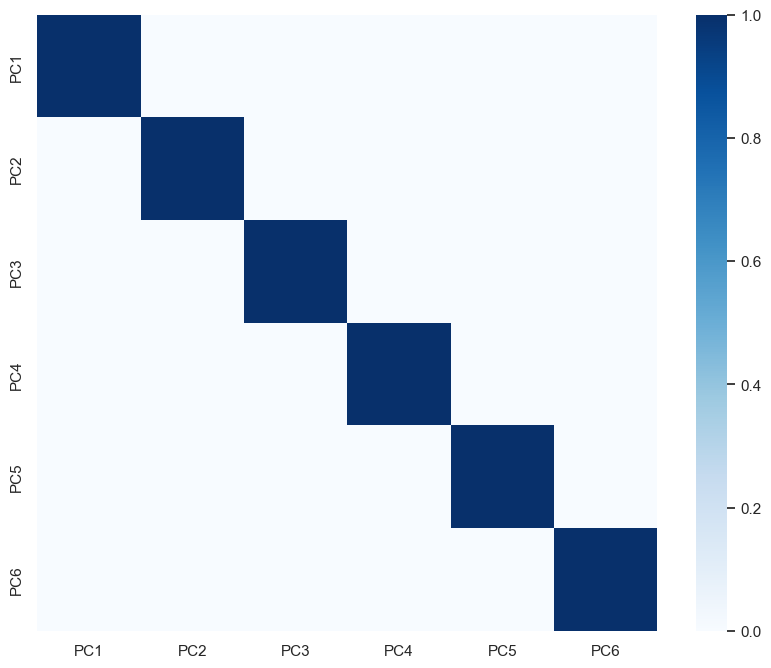

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final[['PC'+str(x) for x in range(1,7)]].corr(), cmap='Blues');

### THE END